<a href="https://colab.research.google.com/github/sbswapnil/Data-Science/blob/main/Pearson's_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Pearson's Correlation:


*  **Pearson's Correlation** is the Feature Selection Method.
*  It shows direction and strenght between dependant and independant variables.
*  This method best suited when there is linear relation between dependant and  Independant.
*  It's value is ranges from **-1 to 1**.

    1.   -1 means there is strong -ve relation between dependant and independant.

    2.   0 means there is no relation between dependant and independant at all.
    3.   1 means there is strong +ve relation between dependant and independant.




# 2) Mathematics Behind Pearson's Correlation


* $Formula:  \frac{cov(X,\ y)}{\sigma(X_i).\sigma(y_i)}$

<br>

*  covarience = $cov(X,\ y)$
*  standerd daviation of X = $\sigma(X_i)$
*  standerd daviation of y = $\sigma(y_i)$  

## 1) Varience:

*  **variance** measures the variation of data from its mean.

*  $formula\ =\ \frac{1}{N}\sum^n_{i=0}(x_i-\overline{x})^2$ 

*  $\overline{x} = mean\ of\ x$
*  $x_i = individual\ element\ of\ x$
*  $N = total\ number\ of\ samples$

## 2) Standard Daviation:

*  **Standerd Daviation** is a square root of varience.
<br>

*  $formula:\ \sigma=\sqrt{\frac{1}{N}\sum^n_{i=0}(x_i-\overline{x})^2}  $ 

## 3) Covarience:

*  **Covarience** measures the linear relation between variables.

*  $cov(x,y)\ =\ \frac{1}{N}\sum^n_{i=0}(x_i-\overline{x})(y_i-\overline{y})$

*  $\overline{x} = mean\ of\ x$
*  $\overline{y} = mean\ of\ y$
*  $x_i = individual\ element\ of\ x$
*  $y_i = individual\ element\ of\ y$
*  $N = total\ number\ of\ samples$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1) X is increasing, y is increasing:

*  we say thay there is strong +ve relation between dependant and independant variables.

## 2) X is increasing, y is constant:

*  we say thay there is no relation at all between dependant and independant variables.

## 3) X is decreasing, y is increasing:

*  we say thay there is strong -ve relation between dependant and independant variables.

*  we are creating some raw data to understand the relation between the two.
* we are also going to plot linear graphs for better understanding.

# 3) Visualizing Data

In [ ]:
X1 = [1,2,3,4,5]
y1 = [1,2,3,4,5]

X2 = [1,2,3,4,5]
y2 = [1,1,1,1,1]

X3 = [5,4,3,2,1]
y3 = [1,2,3,4,5]

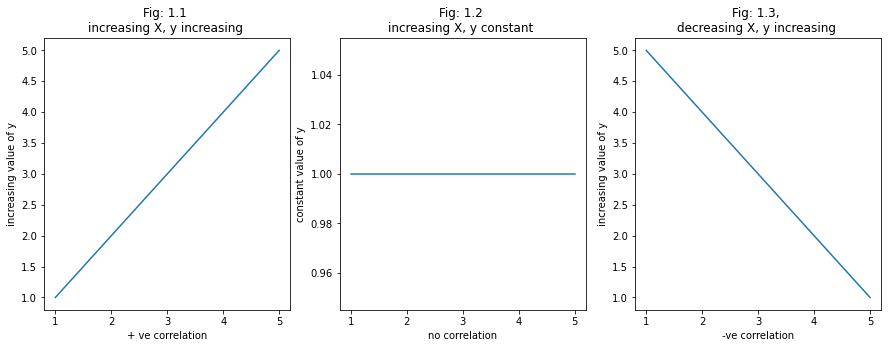

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(X1, y1)
plt.title('Fig: 1.1 \nincreasing X, y increasing ')
plt.xlabel('+ ve correlation')
plt.ylabel('increasing value of y')

plt.subplot(1,3,2)
plt.plot(X2, y2)
plt.title('Fig: 1.2 \nincreasing X, y constant ')
plt.xlabel('no correlation')
plt.ylabel('constant value of y')

plt.subplot(1,3,3)
plt.plot(X3, y3)
plt.title('Fig: 1.3, \ndecreasing X, y increasing ')
plt.xlabel('-ve correlation')
plt.ylabel('increasing value of y')

plt.show()

*  In fig 1.1, we can observe that if value of X is increasing the value of y is also incresing it means that there strong +ve correlation between these two.


*  In fig 1.2, we can observe that if value of X is increasing the value of y is constant it means that there no correlation at all.


*  In fig 1.3, we can observe that if value of X is decreasing the value of y is incresing it means that there strong -ve correlation between these two.

Now, Its time for applying Pearson's Correlation.

# 4) Importing Dataset

In [ ]:
# import dataset
# here we are using housing dataset.

train_data = pd.read_csv('/content/drive/MyDrive/My Datasets/House Price/train.csv')


In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.shape

(1460, 81)

*  Here, we are not doing any kind of feature engineering, so we are selecting only integer columns and dropping rows which have null values just for applying pearson's correlation.

# 5) cleaning Dataset

In [ ]:
# getting only integer columns.

train_data.drop(train_data.select_dtypes(include='object').columns, inplace=True, axis=1)

In [ ]:
# dropping columns which have missing value percentage greater than 60

train_data.drop(train_data.columns[train_data.isnull().mean()>0.60], inplace=True, axis=1)
train_data.shape

(1460, 38)

*  this heatmap shows how many null values are present the dataset.

# 6) Displaying null values useing heatmap

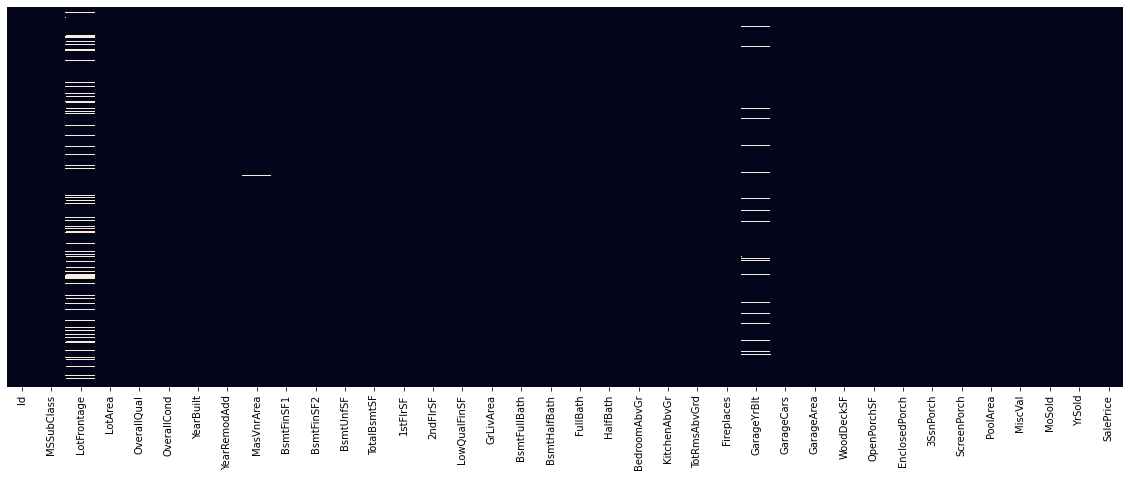

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)
plt.show()

In [ ]:
# dropping rows which have missing values.
train_data.dropna(inplace=True, axis=0)


In [ ]:
train_data.shape

(1121, 38)

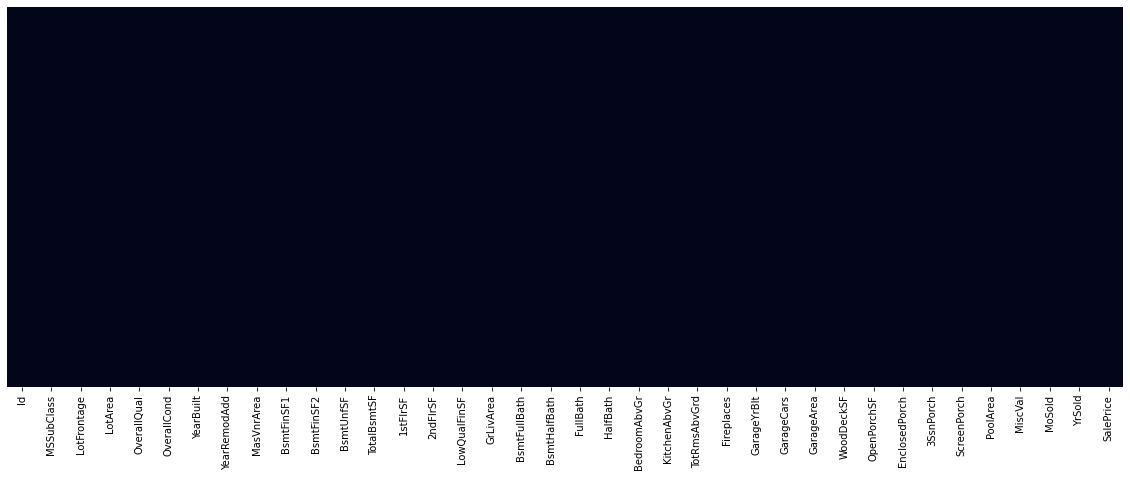

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)
plt.show()

So, we have cleaned our dataset till now. time to use pearson's correlation.


# 7) Applying Pearson's Correlation

In [ ]:
# import libraries 

from sklearn.feature_selection import f_regression, SelectKBest

# f_regression method used for pearson's correlation.
# SelectKBest method used to select top k best features.

In [ ]:
X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']

# 8) Using electKBest Method

In [ ]:
skb = SelectKBest(score_func=f_regression, k=10)

In [ ]:
# fit meathod used to fit model on dataset using our score function.

skb.fit(X, y)

SelectKBest(k=10, score_func=<function f_regression at 0x7fded4e704d0>)

In [ ]:
# get_support() returns the boolean list of columns .

col = skb.get_support()
col

array([False, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
# get_support(indices=True) returns the list of k columns indices which have high pearson's correlations.

col = skb.get_support(indices=True)
col

array([ 4,  6,  7, 12, 13, 16, 19, 23, 26, 27])

In [ ]:
# scores_ returns correlation values of every feature.
skb.scores_

array([2.49023403e+00, 8.73950826e+00, 1.50458329e+02, 1.10639690e+02,
       1.96036658e+03, 1.75866077e+01, 4.26662160e+02, 4.17465247e+02,
       3.51021787e+02, 2.01096191e+02, 8.79325850e-01, 5.32479989e+01,
       6.82869769e+02, 6.56137887e+02, 1.16337572e+02, 2.45763523e-03,
       1.10672093e+03, 6.64373624e+01, 1.49381397e+00, 5.29173583e+02,
       8.69809362e+01, 3.20295557e+01, 2.25333340e+01, 4.77935018e+02,
       3.03445055e+02, 3.82561158e+02, 8.05838393e+02, 6.96288859e+02,
       1.43226582e+02, 1.49551920e+02, 2.74886917e+01, 1.06092031e+00,
       1.38136215e+01, 9.65457023e+00, 1.45543888e+00, 2.98365208e+00,
       1.57654584e-01])

# 9) Final Dataset

In [ ]:
# this is our final dataset after using pearson's correlation

X.iloc[:, col]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460
1456,6,1978,1988,1542,2073,2073,2,7,2,500
1457,7,1941,2006,1152,1188,2340,2,9,1,252
1458,5,1950,1996,1078,1078,1078,1,5,1,240
